In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_row' , 20)
pd.set_option('display.max_columns' , 15)
pd.set_option('display.width' , 10)

In [3]:
dataset = pd.read_csv('diabetes.csv')
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# Advanced EDA - "dtale"

In [7]:
# !pip install dtale

In [8]:
import dtale
#import dtale.app as dtale_app

In [9]:
dtale.show(dataset)

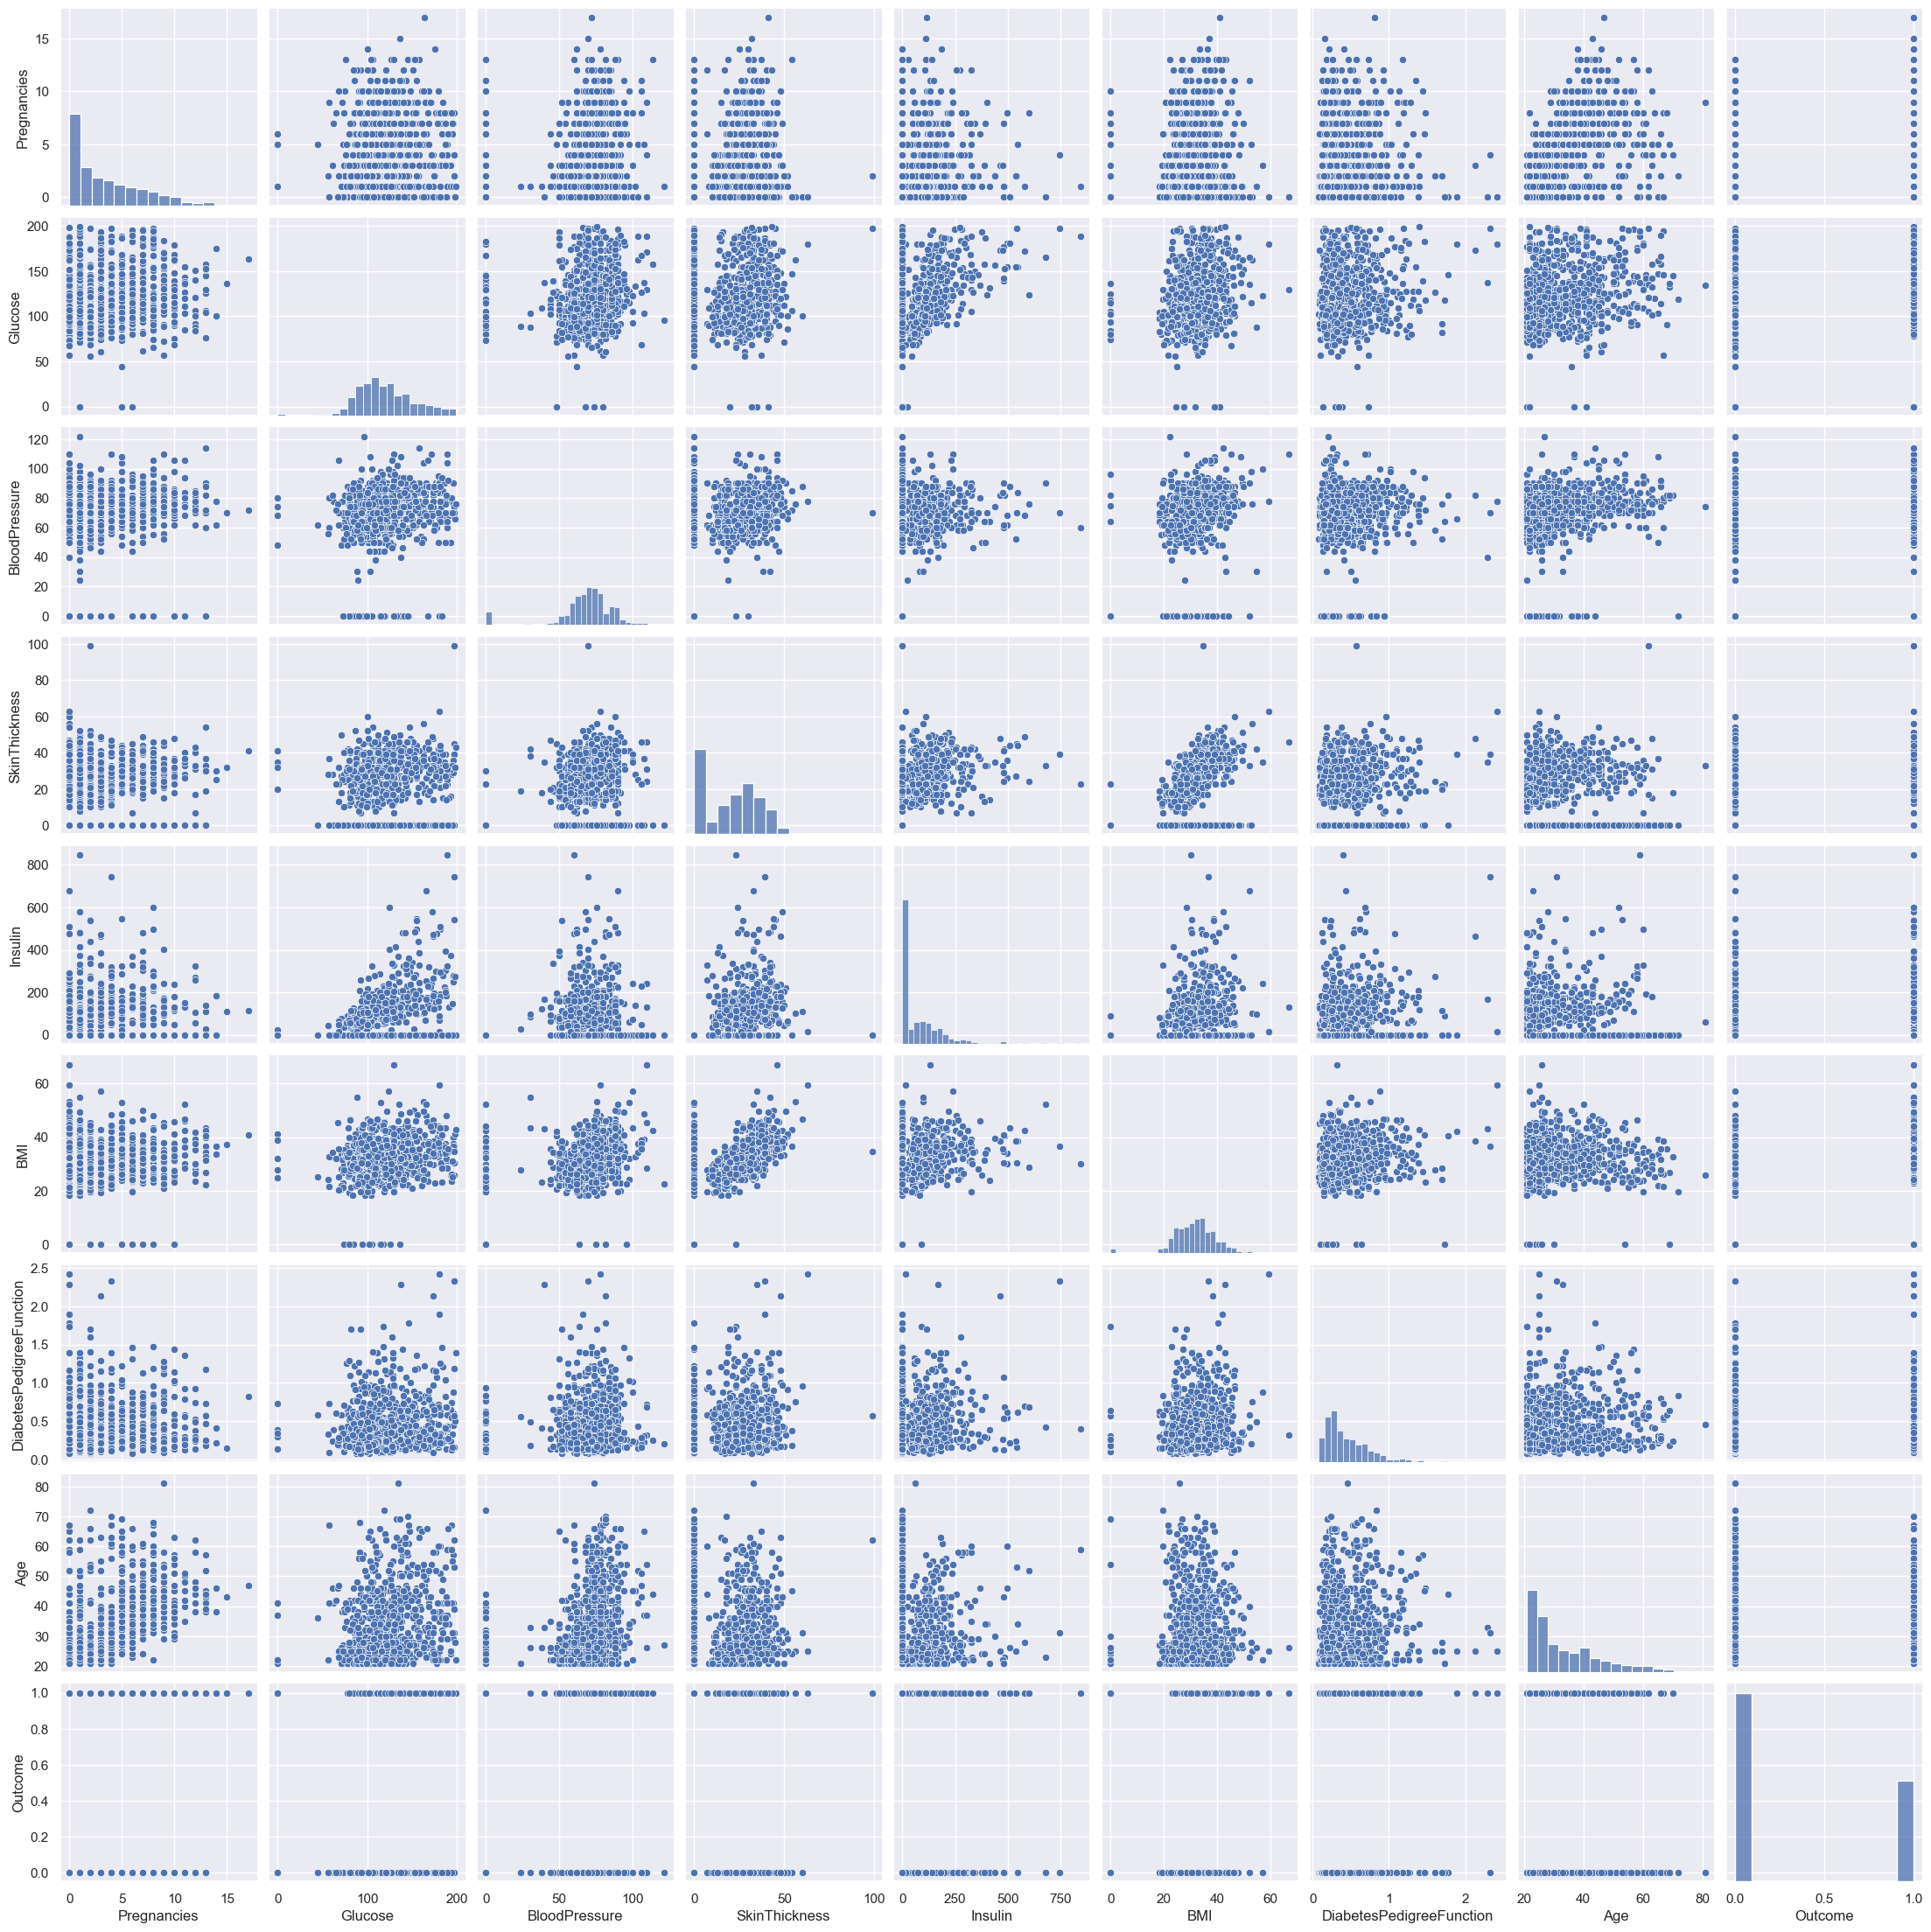

In [10]:
sns.pairplot(dataset)

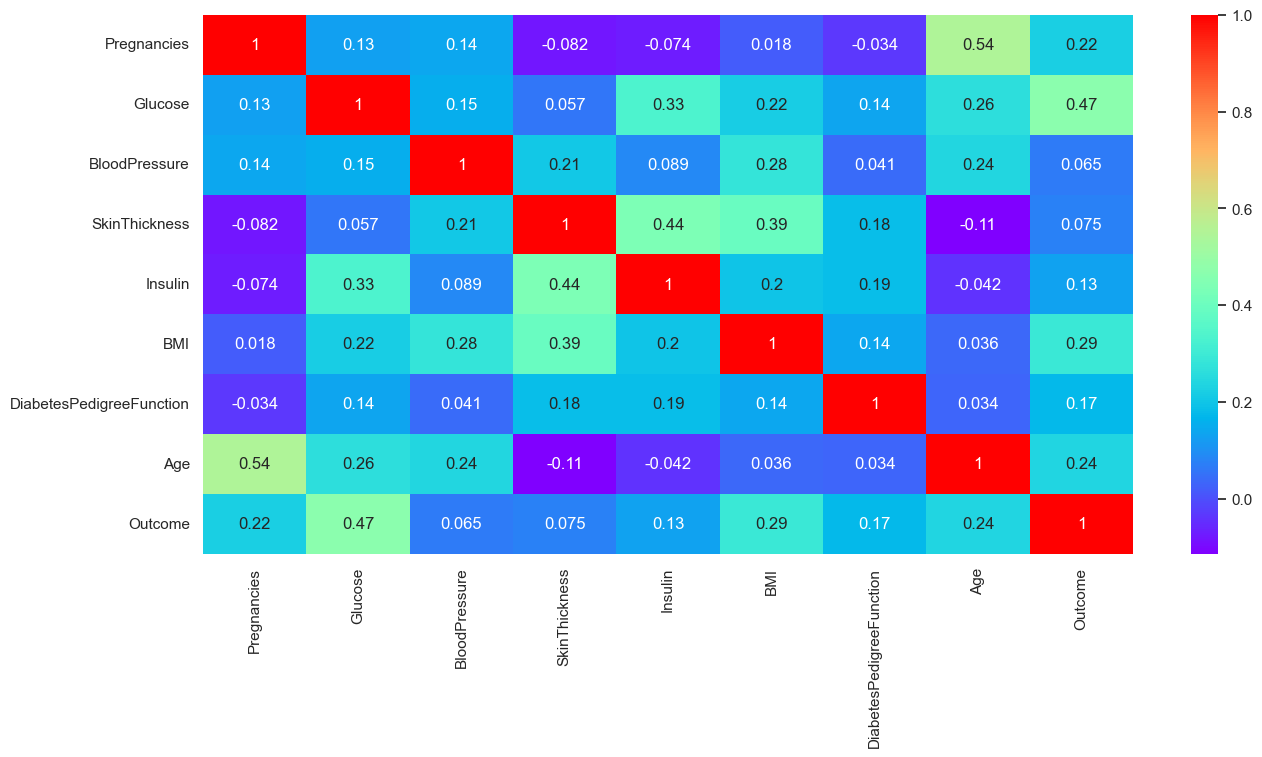

In [11]:
plt.figure(figsize = (15,7))
sns.heatmap(dataset.corr() , annot=True , cmap = 'rainbow')
plt.show()

In [12]:
# pip install --upgrade pip

In [13]:
dataset["Glucose"].value_counts()/len(dataset)*100

Glucose
99     2.213542
100    2.213542
111    1.822917
129    1.822917
125    1.822917
         ...   
191    0.130208
177    0.130208
44     0.130208
62     0.130208
190    0.130208
Name: count, Length: 136, dtype: float64

In [14]:
def imputation(column):
    dataset[column] = np.where(dataset[column] == 0 , dataset[column].median() , dataset[column])

In [15]:
columns = [ "Glucose" , "BloodPressure" ,  "SkinThickness" , "Insulin" , "BMI"]

for i in columns:
    imputation(i)

In [16]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [17]:
# sigmoid = ( 1 / 1 + e^-y)

def sigmoid(z):
    return (1/(1+np.exp(-z)))

In [18]:
sigmoid(-5900)

0.0

In [19]:
# check dataset is balance or not 


# minority *2 < majority ==== imbalance

dataset["Outcome"].value_counts()/len(dataset)*100

Outcome
0    65.104167
1    34.895833
Name: count, dtype: float64

In [20]:
x =  dataset.iloc[:,:-1:]
y = dataset.iloc[:,-1]

In [21]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.0,30.5,33.6,0.627,50
1,1,85.0,66.0,29.0,30.5,26.6,0.351,31
2,8,183.0,64.0,23.0,30.5,23.3,0.672,32
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63
764,2,122.0,70.0,27.0,30.5,36.8,0.340,27
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30
766,1,126.0,60.0,23.0,30.5,30.1,0.349,47


In [22]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

# imbalance Treatment

In [23]:
import imblearn
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
x_sam , y_sam = ros.fit_resample(x,y)
print("original data: ", y.value_counts())
print("After oversampling data: ", y_sam.value_counts())

original data:  Outcome
0    500
1    268
Name: count, dtype: int64
After oversampling data:  Outcome
1    500
0    500
Name: count, dtype: int64


In [40]:

# Split the data Training and testing

from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(x_sam ,y_sam , test_size=0.3 , random_state=43 ,
                                    )

# Scaling Data

In [41]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [42]:
len(x_train)/len(dataset) * 100 , len(y_train)/len(dataset) *100

(91.14583333333334, 91.14583333333334)

# Builidng LogisticRegression 

In [43]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)


LogisticRegression()

# Prediction train and test



In [44]:
y_pred_train = lr.predict(x_train)
y_pred_test = lr.predict(x_test)


In [45]:
from sklearn import metrics
print("Accuracy % ", metrics.accuracy_score(y_pred_train ,y_train ))
print("Confusion Matric \n" , metrics.confusion_matrix(y_pred_train, y_train))

print("*"*15)
print("Confusion Matric \n" , metrics.classification_report(y_pred_train, y_train))

Accuracy %  0.7457142857142857
Confusion Matric 
 [[261  91]
 [ 87 261]]
***************
Confusion Matric 
               precision    recall  f1-score   support

           0       0.75      0.74      0.75       352
           1       0.74      0.75      0.75       348

    accuracy                           0.75       700
   macro avg       0.75      0.75      0.75       700
weighted avg       0.75      0.75      0.75       700



In [46]:
print("Accuracy % ", metrics.accuracy_score(y_pred_test ,y_test ))
print("Confusion Matric \n" , metrics.confusion_matrix(y_pred_test, y_test))
print("*"*15)
print("Confusion Matric \n" , metrics.classification_report(y_pred_test, y_test))

Accuracy %  0.7
Confusion Matric 
 [[106  44]
 [ 46 104]]
***************
Confusion Matric 
               precision    recall  f1-score   support

           0       0.70      0.71      0.70       150
           1       0.70      0.69      0.70       150

    accuracy                           0.70       300
   macro avg       0.70      0.70      0.70       300
weighted avg       0.70      0.70      0.70       300



In [47]:
# AUC _ ROC curve
# K-fold Method
# EDA - dtale , pandas profilling, datapred , LuxS

# K-Fold Method

In [48]:
from sklearn.model_selection import cross_val_score

accuracy = cross_val_score(lr,x_train , y_train , cv = 10)
print(accuracy )
print()
print(accuracy.mean())
print()
print(accuracy.max())

[0.82857143 0.68571429 0.7        0.8        0.78571429 0.71428571
 0.7        0.7        0.77142857 0.71428571]

0.74

0.8285714285714286


# ROC -AOC

In [49]:
from sklearn.metrics import roc_auc_score

logist_roc_auc = roc_auc_score(y_test , y_pred_test)
logist_roc_auc

0.7000355618776671

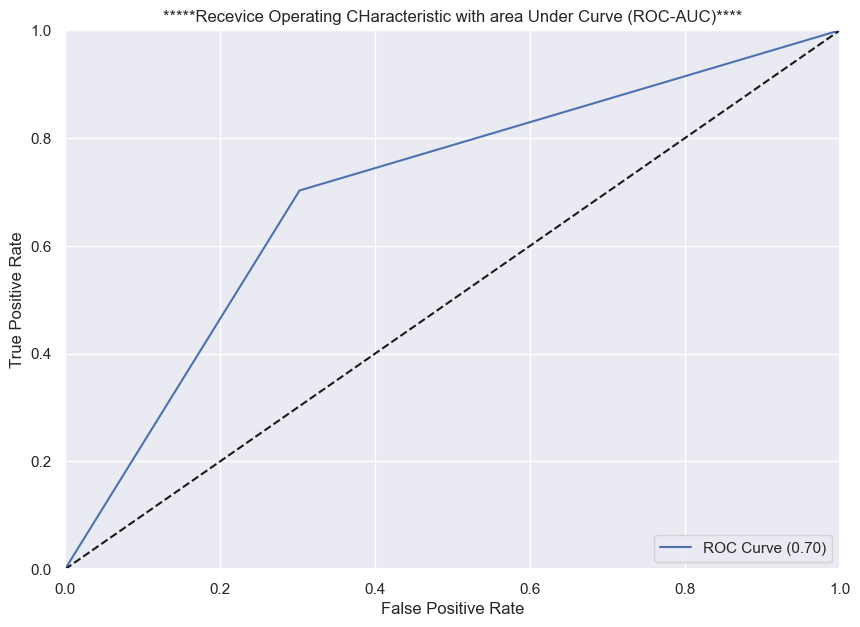

In [52]:
from sklearn.metrics import roc_curve

fpr,tpr , threshold = roc_curve(y_test , y_pred_test)


plt.figure(figsize = (10,7))
plt.plot(fpr , tpr , label = "ROC Curve (%0.2f)" %logist_roc_auc)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("*****Recevice Operating CHaracteristic with area Under Curve (ROC-AUC)****")
plt.legend(loc = "lower right")
plt.show()


<Axes: >

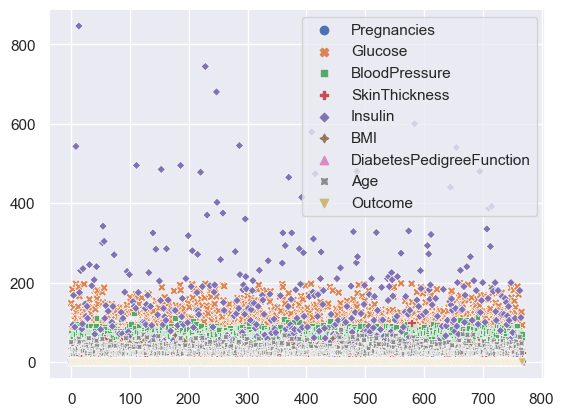

In [53]:
sns.scatterplot(dataset)

In [59]:
# import statsmodels.api as sm
# from statsmodels.regression.linear_model import OLS

# from sklearn.linear_model import LogisticRegression

# log = sm.LogisticRegression()
# log.fit(x_train , y_train)
# log.summary()